# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [72]:
# you are free to use any package you deem fit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Dataset

In [41]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

#### Data Inspection
Let's check the `X` data

In [54]:
# Ensure the data is an array and return it's shape
X = np.asarray(X)
X.shape

(500, 2)

It's a 2D array. Let's run some summary statistics

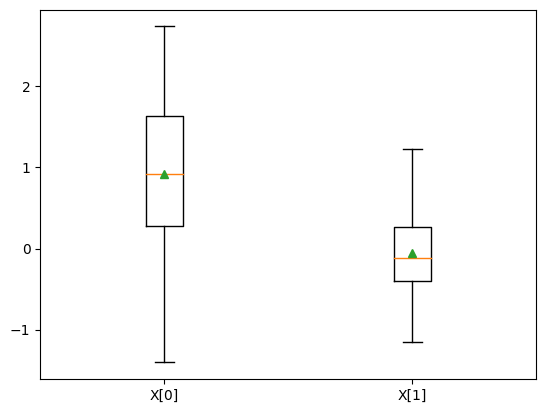

In [78]:
# Mean, Median, and IQR of dataset; determining of there's need of a scaler
plt.boxplot(X, labels = ['X[0]', 'X[1]'], showmeans = True);

We know the Y data is one's and zero's, so we don't need to inspect that

In [55]:
Y = np.asarray(Y)
Y.shape

(500,)

## Helpful Functions

In [202]:
def percent_change(final, initial):
    return 100 * (final - initial) / initial

def solver_performance(solver_name):
    model = LogisticRegression(solver = solver_name).fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test,y_test)

def multi_class_performance(multi_class_name):
    model = LogisticRegression(multi_class = multi_class_name).fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test,y_test)

def intercept_performance(intercept_value):
    model = LogisticRegression(C = intercept_value).fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test,y_test)

# Note that func has to be one of the functions with the name *_performance
def create_custom_dict(arr, func):
    return {i: func(i) for i in arr}

def performance_change(performance_dict, base_values):
    train = {method: performance_dict[method][0] - base_values[0] for method in performance_dict}
    test = {method: performance_dict[method][1] - base_values[1] for method in performance_dict}
    return train, test

## Training

In [60]:
# Choosing a testing size of 30% because we have enough training data
# random_state is set to 42 because it was set to 42 in the make_moons() method
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=42)

In [82]:
#Ensuring training size is as expexted
print('X_train shape is: ' + str(X_train.shape))
print('y_train shape is: ' + str(y_train.shape))

X_train shape is: (350, 2)
y_train shape is: (350,)


## Testing / Optimization

#### Base Model

In [85]:
# Fit the base model
model = LogisticRegression()
model = model.fit(X_train,y_train)

In [93]:
# Base model training score
model_base_train = model.score(X_train, y_train)
model_base_train

0.9228571428571428

In [151]:
# Base model testing score
model_base_test = model.score(X_test, y_test)
model_base_test

0.9533333333333334

In [189]:
model_base_performance = model_base_train, model_base_test

#### Iterate over solvers
The last model performed quite well on the training data, and generalized well on the testing data.

In [192]:
# Generate an array of solvers to iterate over
solvers = np.array(['newton-cg', 'sag', 'saga', 'lbfgs'])

# Initialize and append results to a dictionary
solver_performances = create_custom_dict(solvers, solver_performance)

# Return results
solver_performances

{'newton-cg': (0.9228571428571428, 0.9533333333333334),
 'sag': (0.9228571428571428, 0.9533333333333334),
 'saga': (0.9228571428571428, 0.9533333333333334),
 'lbfgs': (0.9228571428571428, 0.9533333333333334)}

Changing the solver had no discernable effect on the performance of the model:

In [199]:
# Calculate the change in performance from the base model to models incorporating each solver
change_in_train, change_in_test = performance_change(solver_performances, model_base_performance)
print('Change in train:' + str(change_in_train))
print('Change in test:' + str(change_in_test))

Change in train:{'newton-cg': 0.0, 'sag': 0.0, 'saga': 0.0, 'lbfgs': 0.0}
Change in test:{'newton-cg': 0.0, 'sag': 0.0, 'saga': 0.0, 'lbfgs': 0.0}


#### Iterate over multi_class arguments

In [169]:
# Generate an array of multi_class arguments to iterate over
multi_class_names = np.array(['auto', 'ovr', 'multinomial'])

# Initialize and append results to a dictionary
multi_class_performances = create_custom_dict(multi_class_names, multi_class_performance)

In [170]:
# Return results
multi_class_performances

{'auto': (0.9228571428571428, 0.9533333333333334),
 'ovr': (0.9228571428571428, 0.9533333333333334),
 'multinomial': (0.9257142857142857, 0.9533333333333334)}

There was a minor improvement in test performance when using the `multinomial` argument for the `multi_class` parameter:

In [200]:
# Calculate the change in performance from the base model to models incorporating each multi_class argument
change_in_train, change_in_test = performance_change(multi_class_performances, model_base_performance)
print('Change in train:' + str(change_in_train))
print('Change in test:' + str(change_in_test))

Change in train:{'auto': 0.0, 'ovr': 0.0, 'multinomial': 0.0028571428571428914}
Change in test:{'auto': 0.0, 'ovr': 0.0, 'multinomial': 0.0}


#### Iterating over different intercepts

In [207]:
# Generate an array of intercepts to iterate over
intercepts = np.arange(0.01,1.0,.1)

# Initialize and append results to a dictionary
intercept_performances = create_custom_dict(intercepts, intercept_performance)

In [ ]:
# Return results
intercept_performances

In [ ]:
# Calculate the change in performance from the base model to models incorporating each multi_class argument
change_in_train, change_in_test = performance_change(intercept_performances, model_base_performance)
print('Change in train:' + str(change_in_train))
print('Change in test:' + str(change_in_test))

#### Normalizing Independent Variables (X[0] and X[1])

In [225]:
# Import method
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler object
scaler = StandardScaler()

# Normalize the training and testing X data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Fit the base model
model = LogisticRegression()
model = model.fit(X_train_scaled,y_train)

In [226]:
# Base model training score
model_base_train = model.score(X_train_scaled, y_train)
model_base_train


0.9228571428571428

In [227]:
# Base model testing score
model_base_test = model.score(X_test_scaled, y_test)
model_base_test

0.9533333333333334

Performance does not change after normalizing the X data.

## Performance Analysis

Using the LogisticRegression in the sklearn.linear_model library yielded a high training score of .9229, and a testing score of .9533. This indicated the model fit the data well in testing and was generalizable to the testing data. Although performance was already quite high, attempts at optimization included changing the solver, multi_class, and intercept parameters, along with using the StandardScaler object to normalize the indedependent variables. Through each of these attempts, the testing performance did not improve. However, this model has performed well with each modification. Further testing (with new data) would be useful to see if the model maintains its precision.